In [1]:
import sys
sys.path.append("/Users/Habib/Google Drive/Uni Heidelberg/12 SS 2018/Masterarbeit/")

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from skimage.feature import peak_local_max
from copy import deepcopy
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
import os
from scipy.ndimage.filters import gaussian_filter
from scipy.ndimage.interpolation import zoom
from skimage.feature import structure_tensor, structure_tensor_eigvals
from skimage import exposure
from scipy.misc import imresize

In [3]:
from shapes import *
from detect_bubbles import *
from evaluate import *

In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

In [6]:
train_dir = "data/train/"
train_img_read = [cv2.imread(os.path.join(train_dir, filename), 0) for filename in os.listdir(train_dir)
            if filename.endswith(".png")]

In [7]:
mess = cv2.imread("/Users/Habib/Google Drive/Uni Heidelberg/11 WS 2017-2018/Masterarbeit/Messungen/Reihe_16/acA1920-155um__21836660__20180418_153328495_0052.bmp", 0)
mess2 = cv2.imread("/Users/Habib/Google Drive/Uni Heidelberg/11 WS 2017-2018/Masterarbeit/Messungen/Reihe_16/acA1920-155um__21836660__20180418_153328495_0627.bmp", 0)
one = cv2.imread("data/one_mess.png", 0)

In [8]:
mess_small = [cv2.imread( os.path.join("data", filename), 0) for filename in os.listdir("data") if filename.endswith("png")]

In [9]:
def show(Axx, Axy, Ayy):
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    plt.imshow(Axx)#, vmax=.8)
    plt.colorbar()
    plt.subplot(222)
    plt.imshow(Ayy)#, vmax=.8)
    plt.colorbar()
    plt.subplot(223)
    plt.imshow(Axy)#, vmax=.8)
    plt.colorbar()

In [10]:
def show2(Axx, Axy):
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    plt.imshow(Axx)#, vmax=.8)
    plt.colorbar()
    plt.subplot(222)
    plt.imshow(Axy)#, vmax=.8)
    plt.colorbar()

In [11]:
r1 = Rectangle(1,3, 4,6)
r2 = Rectangle(3,5, 5,7)
r3 = Rectangle(1,1, 2,2)

In [12]:
rr = Rectangle()

In [13]:
rr.by_center_width_height(15,10, 1,1)

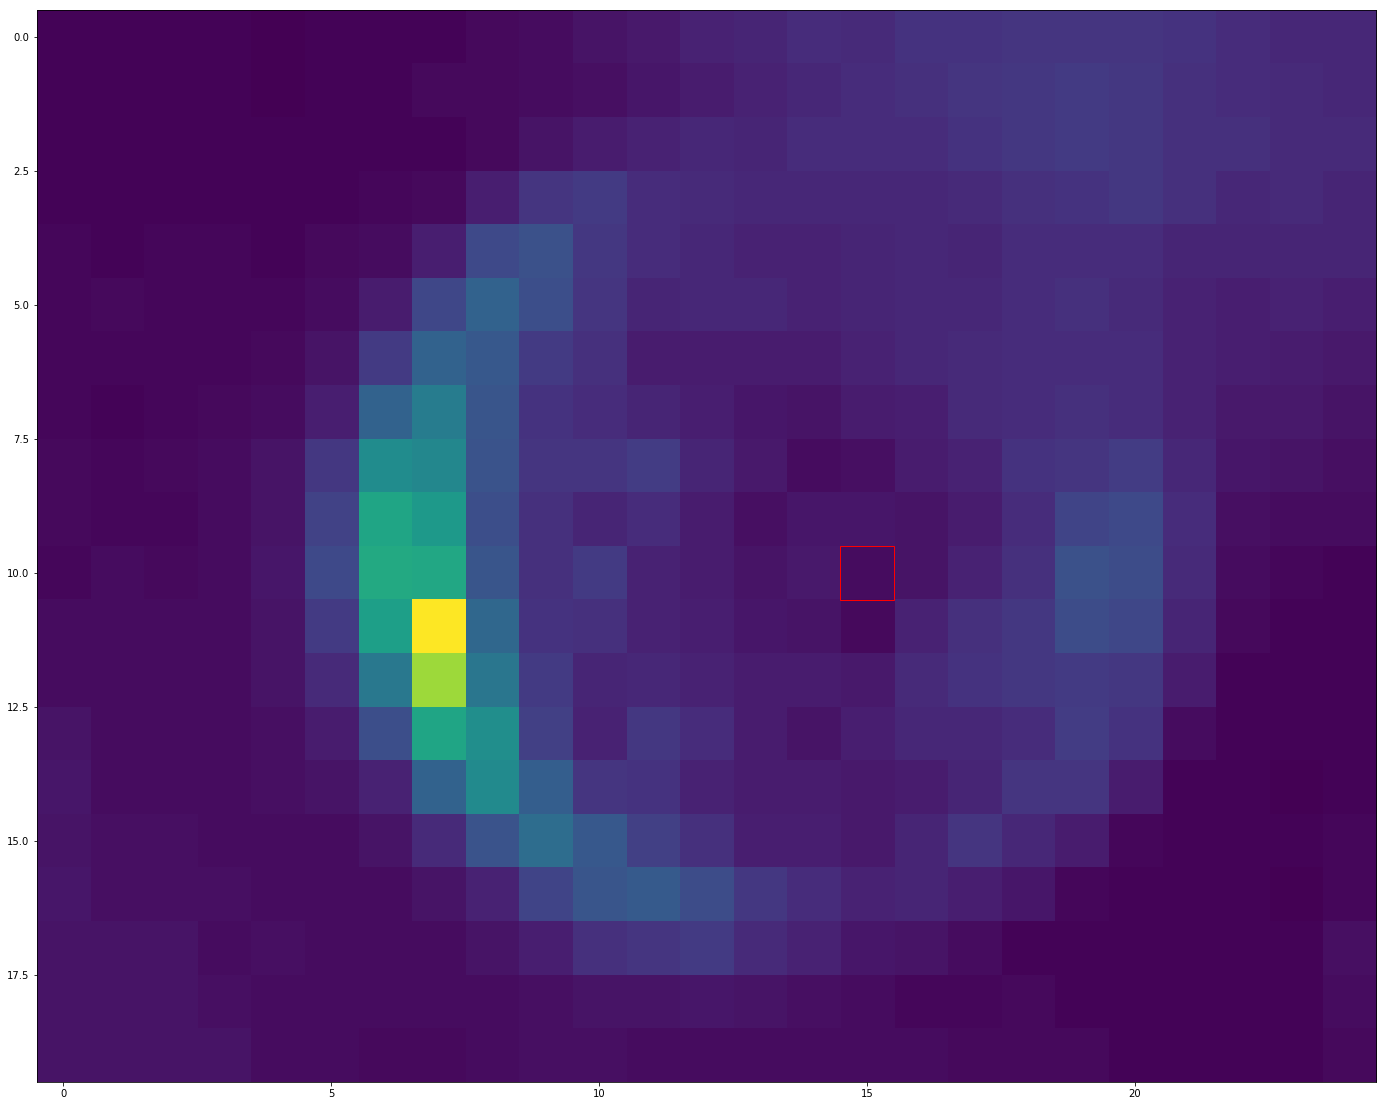

In [14]:
fig,ax = plt.subplots(1)
fig.set_size_inches(24,24)
#one[rr.ymin, rr.xmin] = 0
ax.imshow(one)

#rect = patches.Circle((15, 10),
#                      0.01,
#                      linewidth=2,
#                     edgecolor='r',
#                     fill=False)
#rect = patches.Rectangle(xy=(10,15), width=1,height=1, color='r', fill=False)
rect = patches.Rectangle(xy=(rr.xmin, rr.ymin), width=rr.width, height=rr.height, color='r', fill=False)
ax.add_patch(rect)

In [15]:
one.min()

20

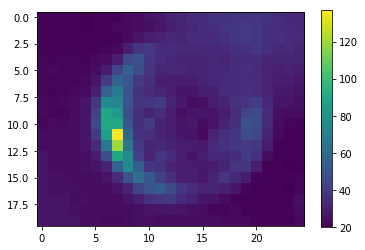

In [16]:
plt.imshow(one)
plt.colorbar()

In [17]:
lm = peak_local_max(one, threshold_abs=100)[0]
loc_max = Point(lm[0], lm[1])
loc_max.get_coord()

(11, 7)

In [18]:
size = 31
xx = np.linspace(0,10, size)
yy = np.linspace(0,10, size)
XX, YY = np.meshgrid(xx, yy)
smooth_mask = utils.gauss_2d_mask([XX,YY], amp=10, mu=[5,5], sigma=[1,1])

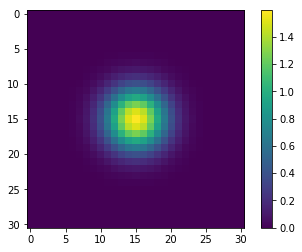

In [19]:
plt.imshow(smooth_mask)
plt.colorbar()

In [26]:
one_pad = np.pad(one, (30, 30), mode="edge")
lm_pad = peak_local_max(one_pad, threshold_abs=100)[0]
loc_max_pad = Point(lm_pad[0], lm_pad[1])

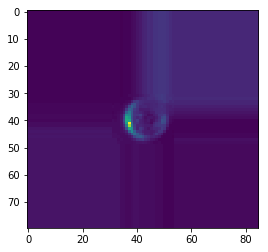

In [27]:
plt.imshow(one_pad)

In [28]:
Axx, Axy, Ayy = utils.my_structure_tensor(one, smooth_mask)

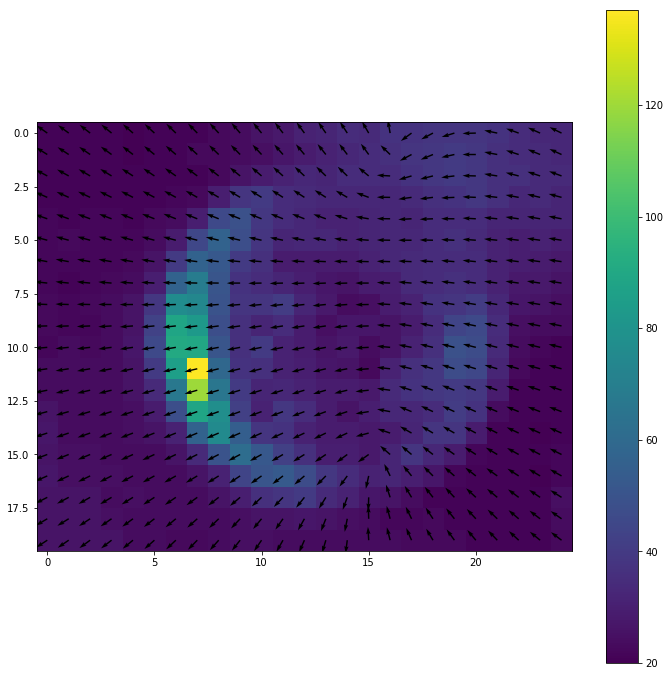

In [29]:
n, m = Axx.shape 
X, Y = np.mgrid[0:n, 0:m]
T = .5 * np.arctan2(2 * Axy, Ayy-Axx)
R = np.ones((one.shape))
U, V = R * (-np.cos(T)), R * (np.sin(T))
plt.figure(figsize=(12,12))
_ = plt.quiver(U, V)
_ = plt.imshow(one)
plt.colorbar()

In [39]:
curve = curve_from_orientation_fit(input_img=one_pad, 
                                   start_point=loc_max_pad,
                                   smooth_mask=smooth_mask,
                                   next_step_size=1,
                                  proportion_threshold=2,
                                   fit_line_nb_samples=30,
                                   len_curve_threshold=40,
                                   curve_preferred_direction="DOWN",
                                  include_first_point=True)

fit converged! mu= 14.8633923885
result point =  (38.756102117237113, 46.604760887254756)
samples 0: (42.137487891781589, 32.131106768879576)
len(samples) 30
result point:  (41.075832526118759, 36.675407117925332)
fit converged! mu= 14.92635321
result point =  (39.715557329047101, 46.893568369100215)
samples 0: (43.111266538005673, 32.358604347235897)
len(samples) 30
result point:  (42.049611172342843, 36.902904696281652)
fit converged! mu= 15.425704512
result point =  (40.061874292499532, 47.473385655984259)
samples 0: (44.331484391389004, 32.650336398297306)
len(samples) 30
result point:  (42.94755729244816, 37.45499515671262)
fit converged! mu= 16.5741818111
result point =  (40.118650804855086, 48.667904694110021)
samples 0: (45.545683923708985, 33.007418934301477)
len(samples) 30
result point:  (43.799342718826061, 38.046738019314084)
fit converged! mu= 18.1260228188
result point =  (39.7514613471442, 50.153147416056704)
samples 0: (46.796790885015959, 33.452367945281793)
len(sampl

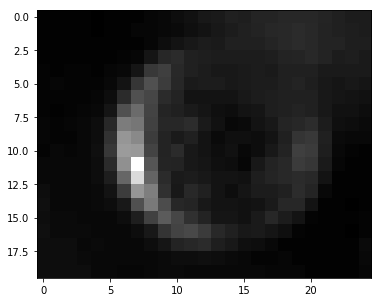

In [32]:
colors = cm.rainbow(np.linspace(0, 1, len(curve)))
fig,ax = plt.subplots(1)
fig.set_size_inches(6,6)
ax.imshow(one, cmap="gray")
for pt, col in zip(curve, colors):
    rect = patches.Circle((pt.y, pt.x),
                              0.1,linewidth=1,
                          edgecolor=col,facecolor='none')
    ax.add_patch(rect)

In [40]:
curve += curve_from_orientation_fit(input_img=one_pad, 
                                   start_point=loc_max_pad,
                                   smooth_mask=smooth_mask,
                                   next_step_size=1,
                                  proportion_threshold=2,
                                    len_curve_threshold=13,
                                    fit_line_max_length=6,
                                fit_line_nb_samples=30,
                                  curve_preferred_direction="UP",
                                  include_first_point=False)

fit converged! mu= 14.3326343672
result point =  (38.421853125053545, 48.035477352291089)
samples 0: (41.682492735068955, 34.078664061327743)
len(samples) 30
result point:  (41.045499515671217, 36.805244270755196)
fit converged! mu= 14.3244393057
result point =  (38.147484473791103, 47.940012140697718)
samples 0: (40.523924638484928, 33.814075231329568)
len(samples) 30
result point:  (40.059401572756471, 36.575273942289385)
fit converged! mu= 14.9094264735
result point =  (37.767684645265184, 48.447861886505997)
samples 0: (39.360596737075404, 33.623772408975114)
len(samples) 30
result point:  (39.06144680900929, 36.407746065556296)
fit converged! mu= 15.9731850684
result point =  (37.551727263776563, 49.463535449951486)
samples 0: (38.160055716470879, 33.501938483340375)
len(samples) 30
result point:  (38.04580265108266, 36.499762066717068)
fit converged! mu= 17.5602979476
result point =  (37.68958688764161, 51.007768311713612)
samples 0: (36.914032462830598, 33.464604989754022)
len(s

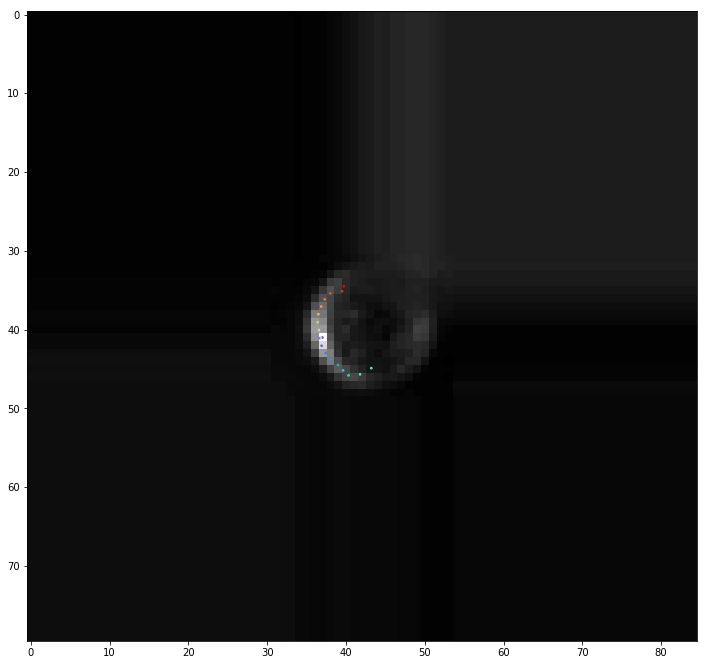

In [41]:
colors = cm.rainbow(np.linspace(0, 1, len(curve)))
fig,ax = plt.subplots(1)
fig.set_size_inches(6,6)
ax.imshow(one_pad, cmap="gray")
for pt, col in zip(curve, colors):
    rect = patches.Circle((pt.y, pt.x),
                              0.1,linewidth=1,
                          edgecolor=col,facecolor='none')
    ax.add_patch(rect)
fig.set_size_inches(12,12)

### circle fit

In [43]:
x_data = [cu.x for cu in curve]
y_data = [cu.y for cu in curve]

In [114]:
x = x_data
y = y_data
x_m = np.mean(x)
y_m = np.mean(y)

In [115]:
from scipy import optimize

def calc_R(xc, yc):
    """ calculate the distance of each 2D points from the center (xc, yc) """
    return sqrt((x-xc)**2 + (y-yc)**2)

def f_2(c):
    """ calculate the algebraic distance between the data points and the mean circle centered at c=(xc, yc) """
    Ri = calc_R(*c)
    return Ri - Ri.mean()

center_estimate = x_m, y_m
center_2, ier = optimize.leastsq(f_2, center_estimate)

xc_2, yc_2 = center_2
Ri_2       = calc_R(*center_2)
R_2        = Ri_2.mean()
residu_2   = sum((Ri_2 - R_2)**2)

print("xc_2 =", xc_2)
print("yc_2 =", yc_2)
print("R_2 =", R_2)

xc_2 = 39.7474543951
yc_2 = 42.1780912836
R_2 = 5.76254469249


In [117]:
residu_2

1.3484673628171295

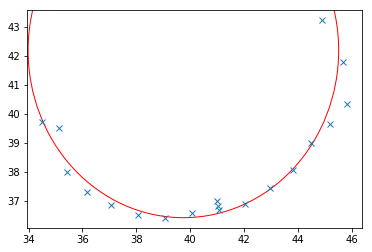

In [118]:
fig, ax = plt.subplots() 
plt.plot(x_data, y_data, 'x')
circ = plt.Circle((xc_2, yc_2), R_2, fill=False, color='r')
ax.add_artist(circ)

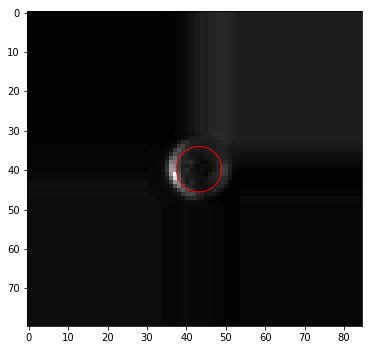

In [131]:
colors = cm.rainbow(np.linspace(0, 1, len(curve)))
fig,ax = plt.subplots(1)
fig.set_size_inches(6,6)
ax.imshow(one_pad, cmap="gray")
rect = patches.Circle((1+yc_2, xc_2),
                          R_2,
                      linewidth=1,
                      edgecolor=col,facecolor='none')

ax.add_patch(rect)

In [ ]:
fit_line = Line(point=Point(11,5), direction=Point(0,1))

In [ ]:
pos = Point(10,5)
max_len = 10
nb_samples = 4
sample_step_size = float(max_len) / nb_samples


In [ ]:
samples, values = sample_fit_line(fit_line=fit_line, pos=pos, img=one, max_len=10, nb_samples=20, bsize=1)
for s, v in zip(samples, values):
    print(s.get_coord(), v)

In [ ]:
np.min(samples)

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, len(samples)))
fig,ax = plt.subplots(1)
fig.set_size_inches(6,6)
ax.imshow(one, cmap="gray")
for pt, col in zip(samples, colors):
    rect = patches.Circle((pt.y, pt.x),
                              0.1,linewidth=1,
                          edgecolor=col,facecolor='none')
    print(pt.get_coord())
    ax.add_patch(rect)

In [ ]:
rr = Rectangle()
rr.by_center_width_height(10,7, 1,1)
px1 = Rectangle()
px1.by_center_width_height(10,7, 1,1)

In [ ]:
print(px1.xmin)
print(px1.ymin)
print(px1.xmax)
print(px1.ymax)

In [ ]:
360 * 42e-6 * 23e3

In [ ]:
313.9%180

In [ ]:
(360 * 23.5e3 * 42.6e-6  )% 180

In [ ]:
np.sqrt((360*42e-6*1.95e3)**2 + (360*23e3*1.2e-6)**2)

In [ ]:
a = 0.937
b = 0.829
da = 0.025
db = 0.028

In [ ]:
np.sqrt(1/(a**2 - b**2) * (db**2 + da**2*(b**2/a**2)) )